In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [3]:
#Display the first 5 rows 
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Display the last 5 row
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
#Display statistic of the data set 
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#See if there are any row missing 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
## AS we see the columns BMI has missing value ( 201 value )- let's explore it 

In [8]:
#Display index has null BMI value 
data[data['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [9]:
#We will replace it with mean value 
mean_bmi = data['bmi'].mean()
data['bmi'].fillna(mean_bmi, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


as we see dataset doesn't contain any null value. We should eliminate the ID columns because it is unique value beause It could reduce the model performance. 


In [11]:
data.drop(columns = ['id'], inplace = True )

In [12]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Now is the step we should ask questions about which feature affect the label the most . Is male or female have more stroke ? which is the most important feature could affect on the label ? Does work_type increase the chance of getting stroke ? 

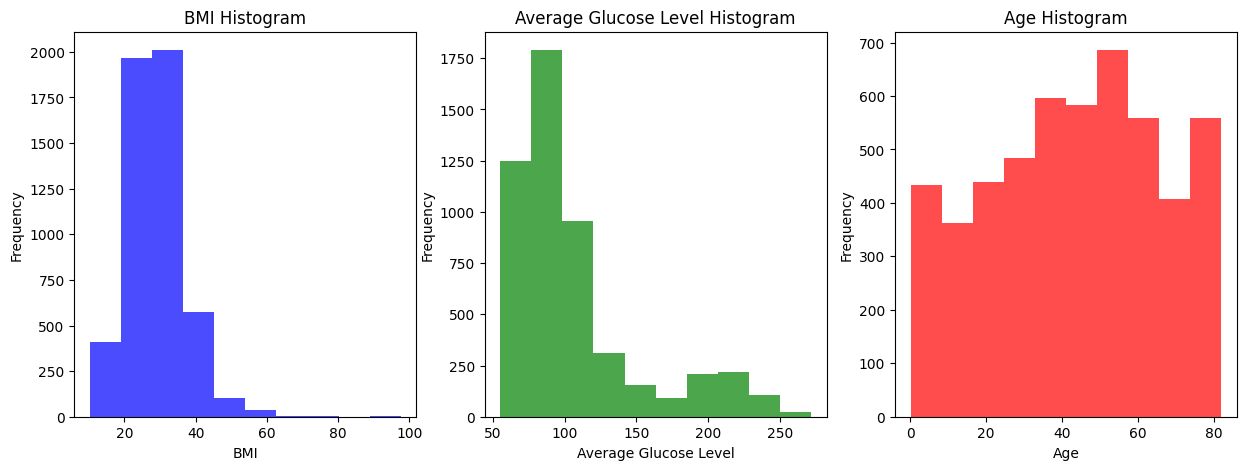

In [13]:
# Histogram for 'BMI'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(data['bmi'], bins=10, color='blue', alpha=0.7)
axes[0].set_title('BMI Histogram')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[1].hist(data['avg_glucose_level'], bins=10, color='green', alpha=0.7)
axes[1].set_title('Average Glucose Level Histogram')
axes[1].set_xlabel('Average Glucose Level')
axes[1].set_ylabel('Frequency')
axes[2].hist(data['age'], bins=10, color='red', alpha=0.7)
axes[2].set_title('Age Histogram')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
plt.show()

Becaue value BMI,Average Glucose Level and Age varible are continous data so we have to display it into histogram to see if they are normal distributed . But look like  BMI and Average glucose Level quite skewed toward right-side. 
* The value of BMI distribute around 7-40 
* The value of Average Glouse Level distribute around 50-120 
* The value of Age is normal-distributed, value spread equally from 0 - 80 

In [14]:
#Next step we should calculate for Skewness and Kurosis
print("SKew of varible age :",data['age'].skew(),", Kurtosis of varible age: ",data['age'].kurt())
print("SKew of varible bmi :",data['bmi'].skew(),", Kurtosis of varible bmi: ",data['bmi'].kurt())
print("SKew of varible average Glouse level :",data['avg_glucose_level'].skew(),", Kurtosis of varible average Glouse level: ",data['avg_glucose_level'].kurt())



SKew of varible age : -0.1370593225984694 , Kurtosis of varible age:  -0.9910102432016696
SKew of varible bmi : 1.0767160713842094 , Kurtosis of varible bmi:  3.6230613267307876
SKew of varible average Glouse level : 1.5722838665030459 , Kurtosis of varible average Glouse level:  1.6804785404038278


If skew > 1 or skew < -1 => highly skew 
If skew < 1 & > 0.5 or skew < -0.5 & > 1 => moderately skew 
If skew > -0.5 & < 0.5 => Normal Distrubition 
As we see the assumption above is correct Age varible is normal distributed but Age and Average Glouse Level are skew-right


In [15]:
#Now we have to plot out all the categorical varible to analysis furthur into the dataset

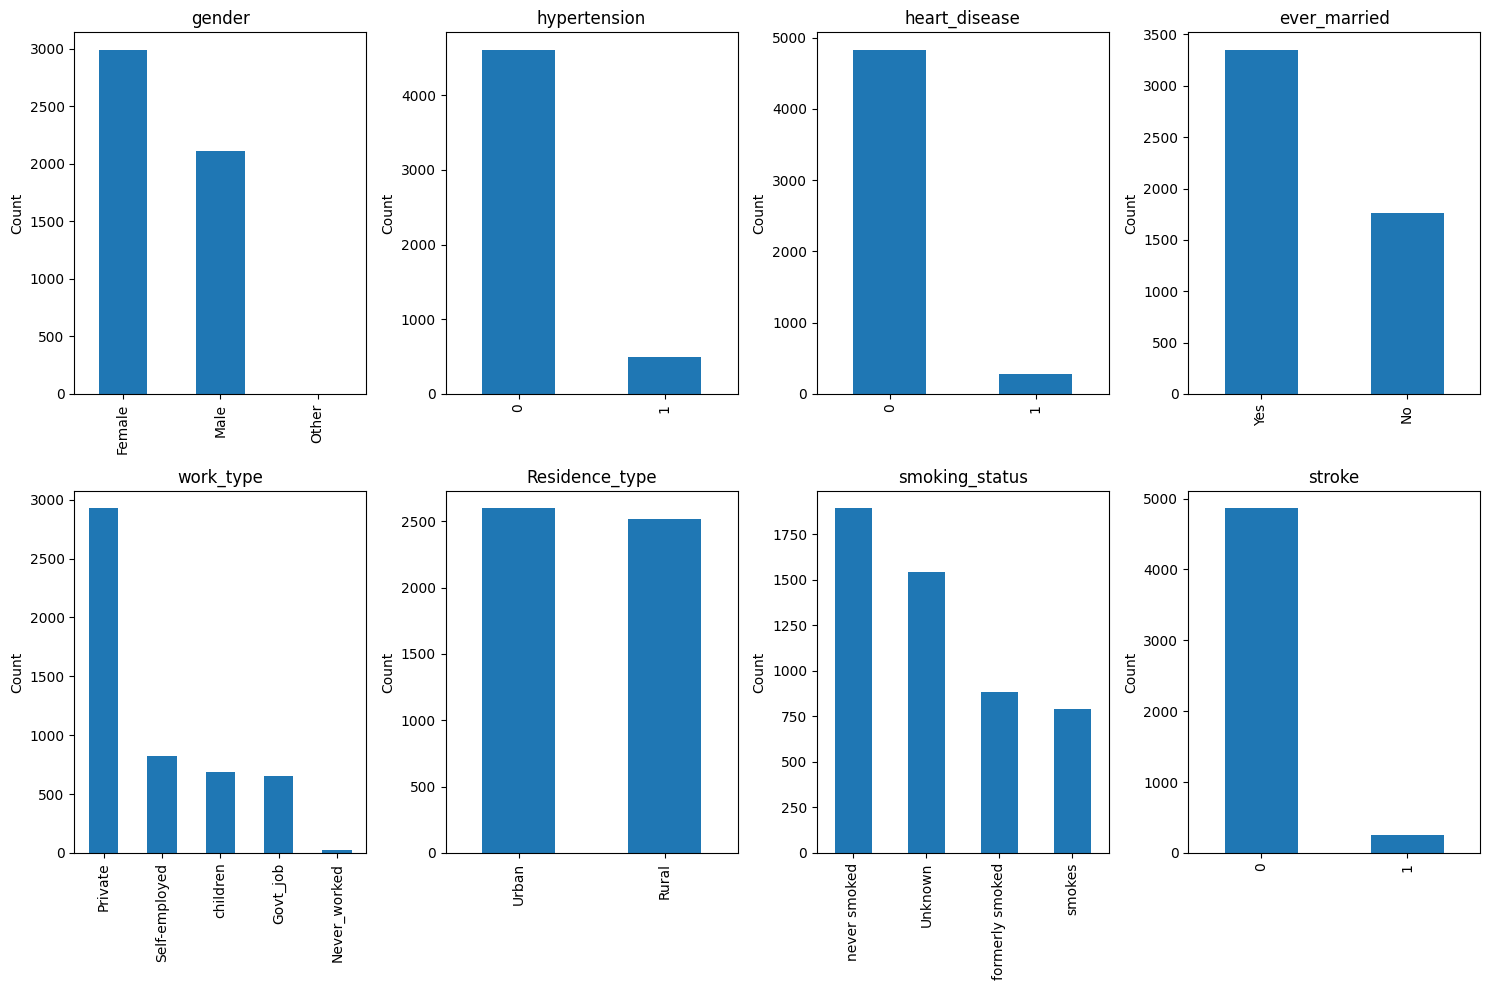

In [16]:
variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    value_counts = data[var].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

* As we see in the gender columns the amount of female is higher than male and the other gender is one so it doesn't appear in the chart
* The people didn't have hypertension is extremey high compare to the people who has it 
* The people who have heart disease is quite low
* People prefer working in Private Company instead of others 
* Data is balance is Residence variable seem like doesn't have a big different between Rural or Urban 
* There are columns Unknow which is still consider if we should remove it or not because we don't know if the person smoking or not
* The Stroke varible data seem unbalance 

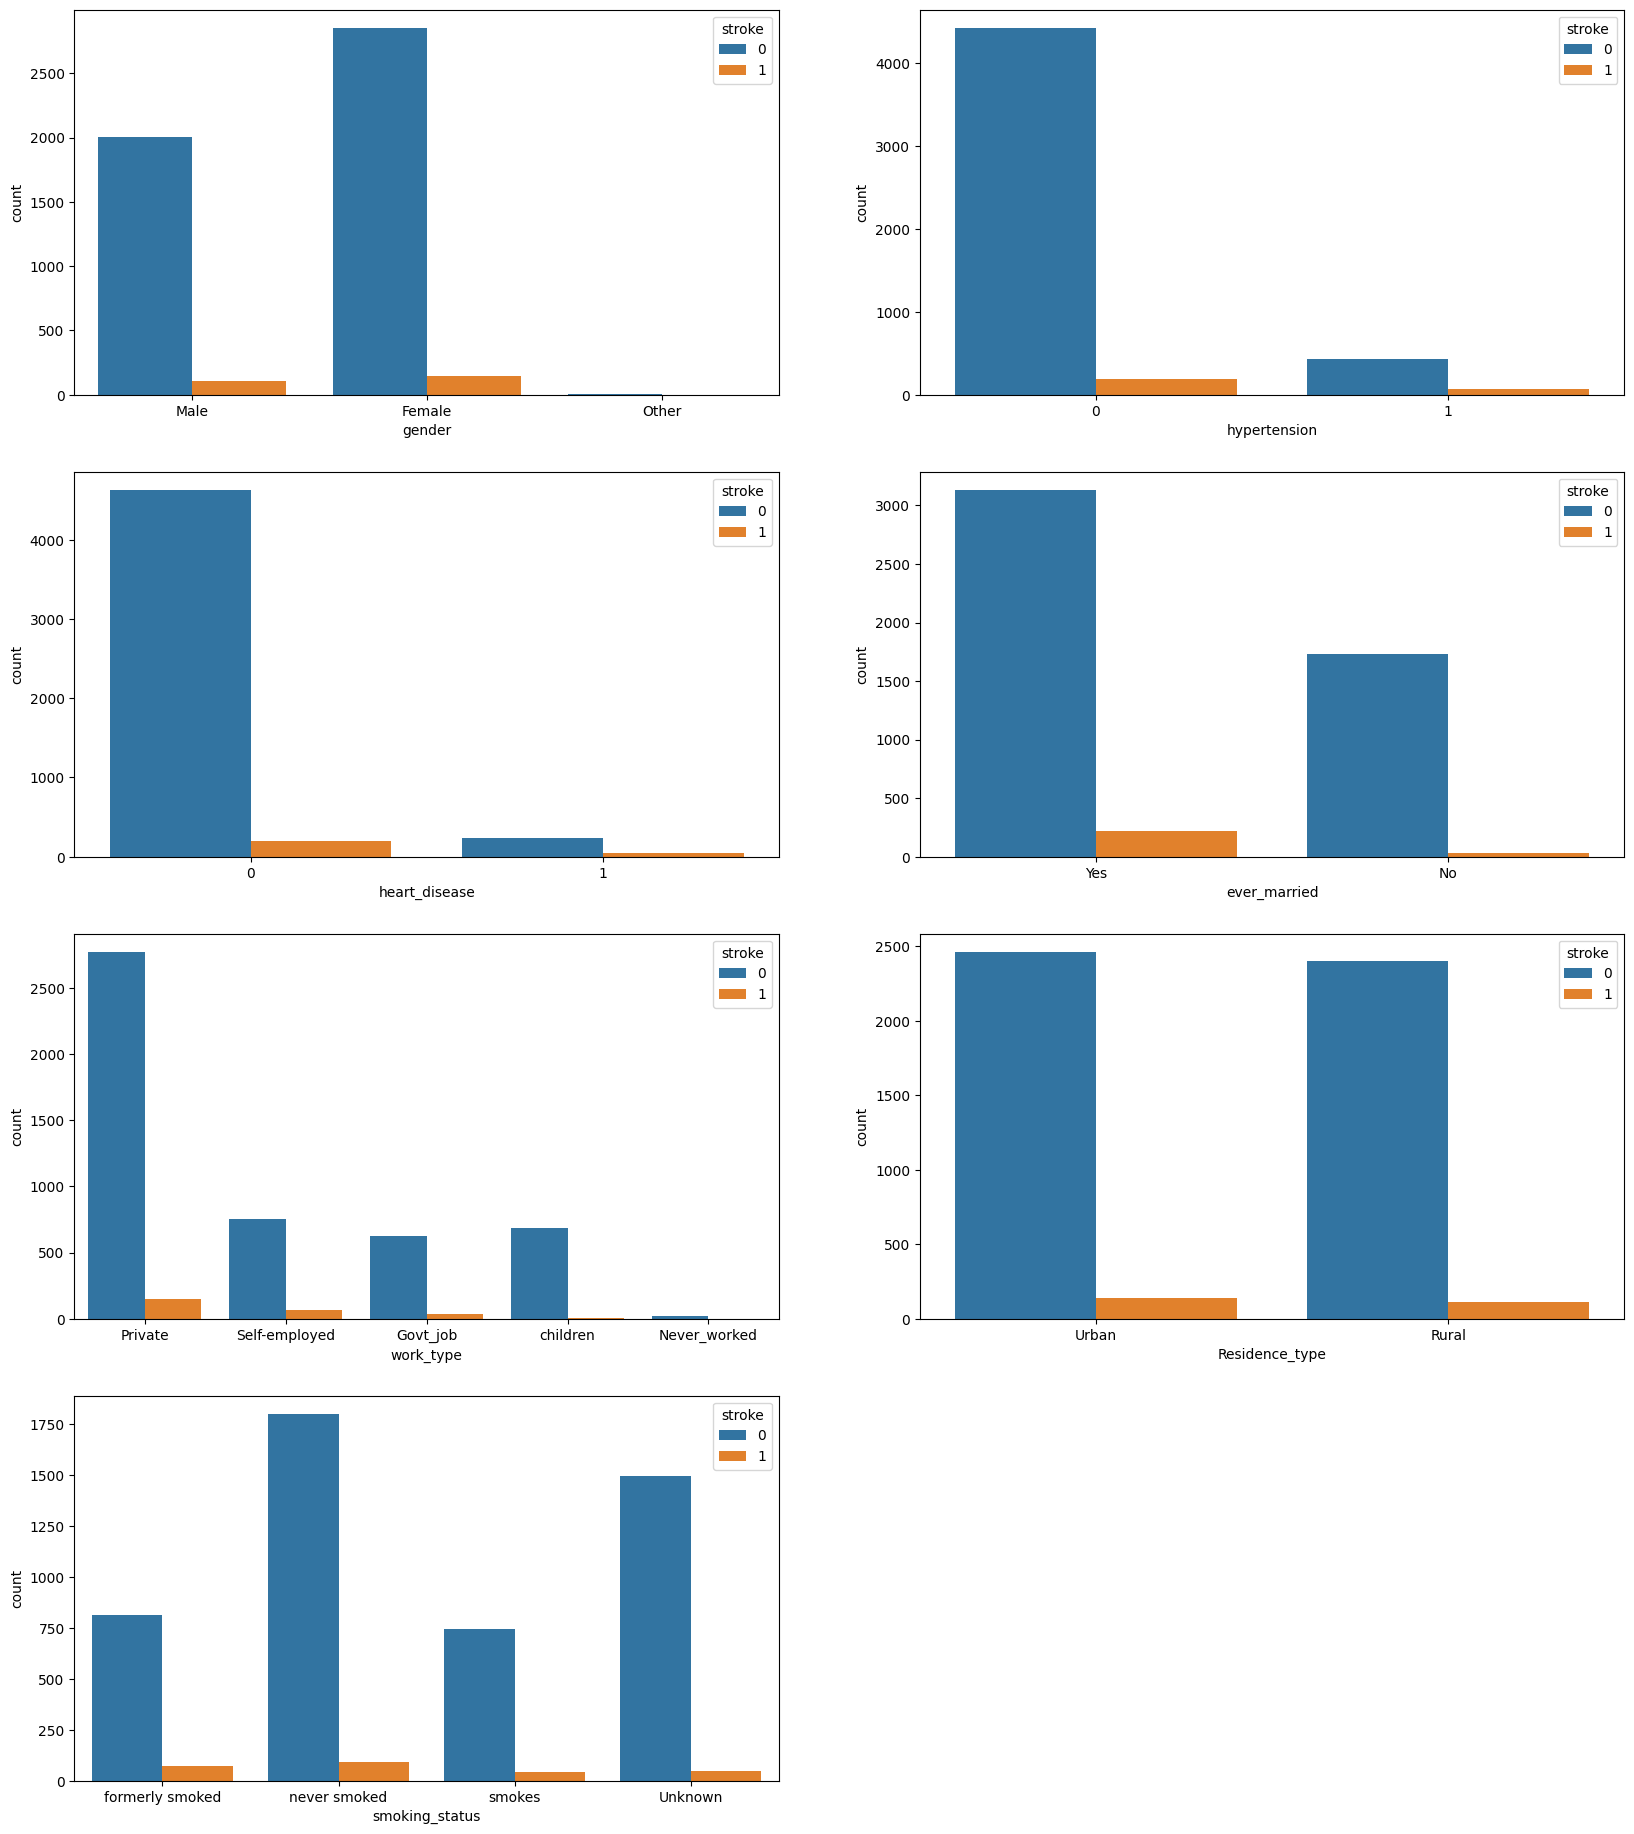

In [17]:
variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

fig=plt.figure(figsize=(20,23))
for i in range(7):
  ax=plt.subplot(4,2,i+1)
  sns.countplot(x =variables[i],hue = "stroke", data = data)
plt.show()


* The amount of Stroke happen equals in both male and female
* For the hypertension people, people without hypertension have a higher chance getting a stroke
* AS with the people doesn't have heart disease, seem like they have higher chance getting a stroke
* Sames with the the people has been marrited , they have hgiher chance getting stroke maybe due to financial stress 
* people who work in Private Company has highest chance getting a stroke maybe due to high & intensive work 
* Doesn't matter if you live in Urban or Rural 
* As we see the funny thing in the last chart, the people who never smoke has the highest chance to get a stroke

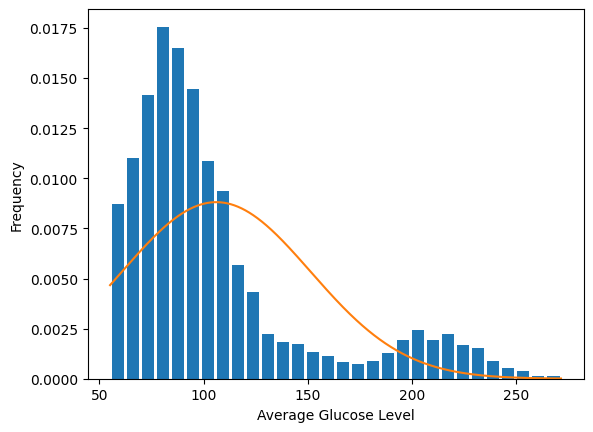

In [18]:
#Now we will remove outliers for 2 continous data varible because they are not normal distributed which is bmi and average glucose level
plt.hist(data['avg_glucose_level'], bins = 30,rwidth=0.8,density=True)
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
rng = np.arange(data['avg_glucose_level'].min(), data['avg_glucose_level'].max(),0.1)
plt.plot(rng, norm.pdf(rng,data['avg_glucose_level'].mean(),data['avg_glucose_level'].std()))

In [19]:
#Z-score Formular ( value of data point - mean of datapoint )/ standard deviation of the data point
data['zscore']= (data['avg_glucose_level']-data['avg_glucose_level'].mean())/data['avg_glucose_level'].std()
print("Min Score: ",data['zscore'].min())
print("Max Score: ",data['zscore'].max())

Min Score:  -1.126847733129534
Max Score:  3.656786753197753


As we see if the z-score is higher than 3 they are likely to have outliers so now next step we will remove all outliers from the variable 

In [20]:
data = data[(data['zscore']<3)]

In [21]:
data.shape

(5061, 12)

We used to have 5110 datapoint now we have 5061 which mean we eliminate 49 data points 

In [22]:
# Now we will remove outliers for bmi variable 

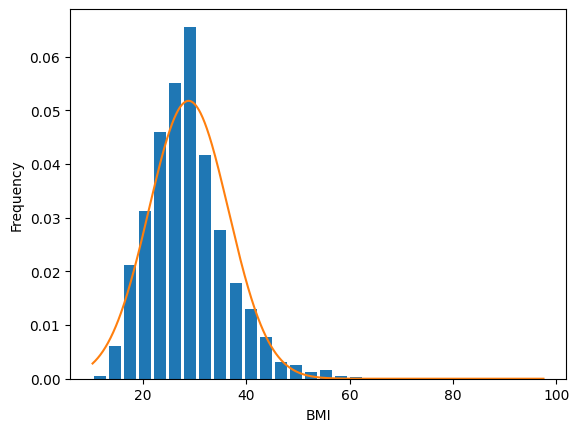

In [23]:
plt.hist(data['bmi'], bins = 30,rwidth=0.8,density=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
rng = np.arange(data['bmi'].min(), data['bmi'].max(),0.1)
plt.plot(rng, norm.pdf(rng,data['bmi'].mean(),data['bmi'].std()))

In [24]:
#Z-score Formular ( value of data point - mean of datapoint )/ standard deviation of the data point
data['zscore']= (data['bmi']-data['bmi'].mean())/data['bmi'].std()
print("Min Score: ",data['zscore'].min())
print("Max Score: ",data['zscore'].max())

Min Score:  -2.4099639248826796
Max Score:  8.920738274935905


As we see if the z-score is higher than 3 they are likely to have outliers so now next step we will remove all outliers from the variable. this one might have lots of outlier 

In [25]:
data = data[(data['zscore']<3)]

In [26]:
data.shape

(5002, 12)

We used to have 5110 datapoint now we have 5002 which mean we eliminate 49 data points 

In [27]:
#We check again the Skew and Kurtosis
print("SKew of varible bmi :",data['bmi'].skew(),", Kurtosis of varible bmi: ",data['bmi'].kurt())
print("SKew of varible average Glouse level :",data['avg_glucose_level'].skew(),", Kurtosis of varible average Glouse level: ",data['avg_glucose_level'].kurt())

SKew of varible bmi : 0.4695477556337987 , Kurtosis of varible bmi:  0.16490427240030492
SKew of varible average Glouse level : 1.5664453924916488 , Kurtosis of varible average Glouse level:  1.7034912924659222


Much better compare before bmi reduce significantly 

In [28]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,zscore
age,1.000000,0.277528,0.262957,0.218924,0.359585,0.243827,0.359585
hypertension,0.277528,1.000000,0.104100,0.160597,0.143213,0.120867,0.143213
heart_disease,0.262957,0.104100,1.000000,0.158241,0.052567,0.126521,0.052567
avg_glucose_level,0.218924,0.160597,0.158241,1.000000,0.171902,0.120517,0.171902
bmi,0.359585,0.143213,0.052567,0.171902,1.000000,0.044924,1.000000
stroke,0.243827,0.120867,0.126521,0.120517,0.044924,1.000000,0.044924
zscore,0.359585,0.143213,0.052567,0.171902,1.000000,0.044924,1.000000


In [29]:
data.corr().min()

age                  0.218924
hypertension         0.104100
heart_disease        0.052567
avg_glucose_level    0.120517
bmi                  0.044924
stroke               0.044924
zscore               0.044924
dtype: float64

As we see there aren't any strong correlation in the dataset which is good . We don't want indication have strong correlation with others . Highest correlation we had is 0.35 bmi and age . lowest correlation we had is heart disease  &  hypertension . The reason we don't use stroke's correlation because it is a target variable

Now we will preprocessing categorical varible because machine doesn't understand character so we will transform it to numerical data. we start mapping 0 and 1 to varible has 2 category which is Gender , Residence_type & EverMarried , we also get rid of smoking status for Unknown because we don't know what we should map for it. 


In [30]:
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
data=data[data['smoking_status']!='Unknown']

After converting from character to 0 and 1 , we still have 2 deature which is working status and work_type , because they have more than 2 values so we will use one hot encoding - dummies encoding and we drop the origin column (  working status and work_type ) 

In [31]:
data_dummies = data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)

We set data_stroke only have a label stroke. and our original data will left merge with the data_dummies wwhich we already encoding and drop the column stroke 

In [32]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

In [33]:
#Split the data set 30 % test - 70 % train 
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(data,data_stroke,test_size=0.3,random_state=42)

In [34]:
# Now we are standardizing our training and testing data before train 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [35]:
#Also this step which refer as adjust the imbalacing data lebel in our dataset 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [36]:
#This step we create every model we could use for classification with all amount of parameter we will train it on 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(max_iter=10000),
    'DT': DecisionTreeClassifier(),
    'kNN' : KNeighborsClassifier()
}
params = { 
    'LogisticRegression': { 'C': [0.1, 1, 2], 'class_weight':['balanced',None] },
    'RandomForestClassifier': { 'n_estimators': [50,200, 300,400,500],'class_weight':['balanced',None]},
    'SVM' : {'kernel':['linear', 'poly', 'rbf', 'sigmoid']},
    'DT' : {'criterion':['gini','Entropy'],'class_weight':['balanced',None]},
    'kNN' : {'n_neighbors': [3,5,7,9,11] , 'weights' : ['uniform','balanced']}
}

In [37]:
#With Cross-validation = 5, we will start to plot it in 
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train, y_train, cv=5)

Search for LogisticRegression ...
Search for RandomForestClassifier ...
Search for SVM ...
Search for DT ...
Search for kNN ...
Search is done.


results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM
results round for: DT
results round for: kNN


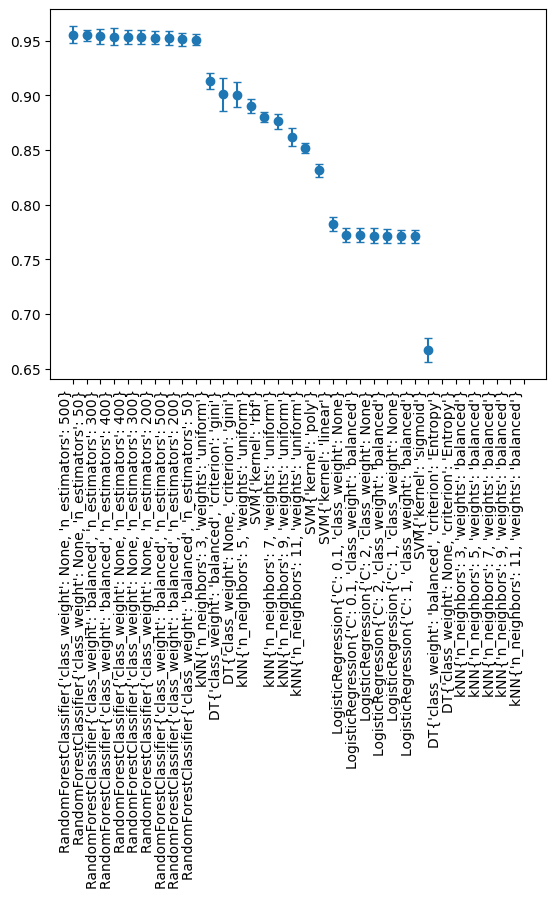

In [38]:
#Display test score and model perform the best 
from matplotlib import pyplot as plt
result = search.evaluate_model()
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')
plt.show()

At we see the first 10 model perform at around 95% and all of them are Random Forrest - One of the strongest-best performance model in classification dataset

In [39]:
from sklearn.metrics import classification_report as report
from sklearn.metrics import roc_curve, auc

In [40]:
#Display it out as a dataframe
search.evaluate_model()


results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM
results round for: DT
results round for: kNN


,Estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,RandomForestClassifier,"{'class_weight': None, 'n_estimators': 500}",0.940347,0.959870,0.955531,0.963084,0.958740,0.955514,0.007959
1,RandomForestClassifier,"{'class_weight': None, 'n_estimators': 50}",0.946855,0.959870,0.953362,0.959826,0.954397,0.954862,0.004823
2,RandomForestClassifier,"{'class_weight': 'balanced', 'n_estimators': 300}",0.941432,0.956616,0.952278,0.958740,0.960912,0.953996,0.006900
3,RandomForestClassifier,"{'class_weight': 'balanced', 'n_estimators': 400}",0.940347,0.959870,0.949024,0.960912,0.957655,0.953562,0.007820
4,RandomForestClassifier,"{'class_weight': None, 'n_estimators': 400}",0.942516,0.956616,0.949024,0.959826,0.958740,0.953345,0.006599
5,RandomForestClassifier,"{'class_weight': None, 'n_estimators': 300}",0.941432,0.956616,0.953362,0.959826,0.954397,0.953127,0.006253
6,RandomForestClassifier,"{'class_weight': None, 'n_estimators': 200}",0.942516,0.953362,0.951193,0.956569,0.959826,0.952693,0.005868
7,RandomForestClassifier,"{'class_weight': 'balanced', 'n_estimators': 500}",0.940347,0.956616,0.952278,0.956569,0.957655,0.952693,0.006444
8,RandomForestClassifier,"{'class_weight': 'balanced', 'n_estimators': 200}",0.940347,0.952278,0.951193,0.956569,0.956569,0.951391,0.005940
9,RandomForestClassifier,"{'class_weight': 'balanced', 'n_estimators': 50}",0.941432,0.952278,0.952278,0.957655,0.951140,0.950956,0.005275


In [41]:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score


In [42]:
clf = RandomForestClassifier(n_estimators=200,class_weight='balanced')
clf.fit(X_train,y_train)
preds = clf.predict(x_test)
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(report(y_test,preds,digits=4))

Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0     0.9430    0.9430    0.9430       982
           1     0.0968    0.0968    0.0968        62

    accuracy                         0.8927      1044
   macro avg     0.5199    0.5199    0.5199      1044
weighted avg     0.8927    0.8927    0.8927      1044



In [43]:
clf = RandomForestClassifier(n_estimators=400,class_weight=None)
clf.fit(X_train,y_train)
preds = clf.predict(x_test)
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(report(y_test,preds,digits=4))

Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0     0.9429    0.9420    0.9424       982
           1     0.0952    0.0968    0.0960        62

    accuracy                         0.8918      1044
   macro avg     0.5191    0.5194    0.5192      1044
weighted avg     0.8926    0.8918    0.8922      1044



As wee see our training ACcuracy is 100% which indicate overfit and testing at 89% also only 9.68% predict correct the label 1 which is low . IS there anyway we could perform better ? Maybe we should use boosting ?  

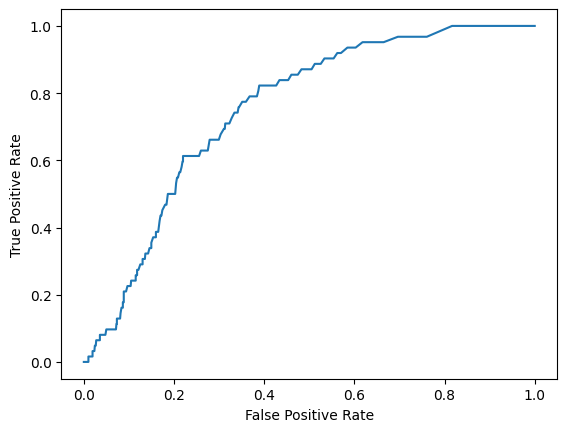

In [44]:
#define metrics
from sklearn import metrics
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
#Now we will use lightGBM as our boosting for the model 
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")
preds = clf.predict(x_test)
print(report(y_test,preds,digits=4))

[LightGBM] [Info] Number of positive: 2304, number of negative: 2304
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2233
[LightGBM] [Info] Number of data points in the train set: 4608, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.9952
              precision    recall  f1-score   support

           0     0.9449    0.9613    0.9531       982
           1     0.1556    0.1129    0.1308        62

    accuracy                         0.9109      1044
   macro avg     0.5503    0.5371    0.5419      1044
weighted avg     0.8981    0.9109    0.9042      1044



As we see the result the training score reduce to 99.52%  and the testing accuracy increase 2% which are good news but out F-1 score still remain low 13.08% maybe due to imbalance data-set even though we try the SMOTE technique handling imabalance problems. We will try the last boosting which is CatBoost

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X_train,y_train)
train_predictions = cb.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")
preds = cb.predict(x_test)
print(report(y_test,preds,digits=4))

Learning rate set to 0.019781
0:	learn: 0.6827298	total: 139ms	remaining: 2m 19s
1:	learn: 0.6719050	total: 154ms	remaining: 1m 16s
2:	learn: 0.6605400	total: 169ms	remaining: 56.1s
3:	learn: 0.6493702	total: 186ms	remaining: 46.4s
4:	learn: 0.6401129	total: 198ms	remaining: 39.4s
5:	learn: 0.6236944	total: 212ms	remaining: 35.2s
6:	learn: 0.6094698	total: 226ms	remaining: 32s
7:	learn: 0.6009676	total: 239ms	remaining: 29.6s
8:	learn: 0.5919927	total: 249ms	remaining: 27.5s
9:	learn: 0.5833922	total: 262ms	remaining: 25.9s
10:	learn: 0.5731079	total: 275ms	remaining: 24.7s
11:	learn: 0.5613995	total: 287ms	remaining: 23.7s
12:	learn: 0.5537060	total: 299ms	remaining: 22.7s
13:	learn: 0.5446245	total: 312ms	remaining: 21.9s
14:	learn: 0.5390355	total: 323ms	remaining: 21.2s
15:	learn: 0.5324026	total: 335ms	remaining: 20.6s
16:	learn: 0.5264514	total: 346ms	remaining: 20s
17:	learn: 0.5198726	total: 358ms	remaining: 19.5s
18:	learn: 0.5112694	total: 370ms	remaining: 19.1s
19:	learn: 0.

169:	learn: 0.2374289	total: 2.24s	remaining: 10.9s
170:	learn: 0.2369254	total: 2.25s	remaining: 10.9s
171:	learn: 0.2362349	total: 2.26s	remaining: 10.9s
172:	learn: 0.2357700	total: 2.28s	remaining: 10.9s
173:	learn: 0.2354762	total: 2.29s	remaining: 10.9s
174:	learn: 0.2350430	total: 2.3s	remaining: 10.9s
175:	learn: 0.2347529	total: 2.31s	remaining: 10.8s
176:	learn: 0.2342311	total: 2.32s	remaining: 10.8s
177:	learn: 0.2338761	total: 2.33s	remaining: 10.8s
178:	learn: 0.2330978	total: 2.35s	remaining: 10.8s
179:	learn: 0.2325390	total: 2.36s	remaining: 10.7s
180:	learn: 0.2319754	total: 2.37s	remaining: 10.7s
181:	learn: 0.2315664	total: 2.38s	remaining: 10.7s
182:	learn: 0.2312930	total: 2.39s	remaining: 10.7s
183:	learn: 0.2305793	total: 2.41s	remaining: 10.7s
184:	learn: 0.2298605	total: 2.42s	remaining: 10.7s
185:	learn: 0.2294008	total: 2.43s	remaining: 10.6s
186:	learn: 0.2288573	total: 2.44s	remaining: 10.6s
187:	learn: 0.2281038	total: 2.45s	remaining: 10.6s
188:	learn: 0

337:	learn: 0.1753446	total: 4.28s	remaining: 8.38s
338:	learn: 0.1752117	total: 4.29s	remaining: 8.37s
339:	learn: 0.1749231	total: 4.3s	remaining: 8.36s
340:	learn: 0.1747062	total: 4.32s	remaining: 8.34s
341:	learn: 0.1744172	total: 4.33s	remaining: 8.33s
342:	learn: 0.1741442	total: 4.34s	remaining: 8.31s
343:	learn: 0.1738680	total: 4.35s	remaining: 8.3s
344:	learn: 0.1736342	total: 4.36s	remaining: 8.29s
345:	learn: 0.1734280	total: 4.38s	remaining: 8.27s
346:	learn: 0.1732063	total: 4.39s	remaining: 8.26s
347:	learn: 0.1729781	total: 4.4s	remaining: 8.24s
348:	learn: 0.1727550	total: 4.41s	remaining: 8.22s
349:	learn: 0.1725526	total: 4.42s	remaining: 8.21s
350:	learn: 0.1723181	total: 4.43s	remaining: 8.2s
351:	learn: 0.1719594	total: 4.45s	remaining: 8.18s
352:	learn: 0.1716730	total: 4.46s	remaining: 8.17s
353:	learn: 0.1714196	total: 4.47s	remaining: 8.15s
354:	learn: 0.1712497	total: 4.48s	remaining: 8.14s
355:	learn: 0.1709761	total: 4.49s	remaining: 8.13s
356:	learn: 0.17

508:	learn: 0.1385666	total: 6.34s	remaining: 6.12s
509:	learn: 0.1384263	total: 6.35s	remaining: 6.1s
510:	learn: 0.1382324	total: 6.36s	remaining: 6.09s
511:	learn: 0.1379847	total: 6.37s	remaining: 6.08s
512:	learn: 0.1378526	total: 6.39s	remaining: 6.06s
513:	learn: 0.1377270	total: 6.4s	remaining: 6.05s
514:	learn: 0.1375919	total: 6.41s	remaining: 6.04s
515:	learn: 0.1374586	total: 6.42s	remaining: 6.03s
516:	learn: 0.1372700	total: 6.44s	remaining: 6.01s
517:	learn: 0.1371396	total: 6.45s	remaining: 6s
518:	learn: 0.1370371	total: 6.46s	remaining: 5.99s
519:	learn: 0.1367531	total: 6.47s	remaining: 5.98s
520:	learn: 0.1366102	total: 6.49s	remaining: 5.96s
521:	learn: 0.1364182	total: 6.5s	remaining: 5.95s
522:	learn: 0.1363135	total: 6.51s	remaining: 5.94s
523:	learn: 0.1361417	total: 6.53s	remaining: 5.93s
524:	learn: 0.1360054	total: 6.54s	remaining: 5.92s
525:	learn: 0.1358065	total: 6.55s	remaining: 5.91s
526:	learn: 0.1356163	total: 6.57s	remaining: 5.89s
527:	learn: 0.1354

681:	learn: 0.1128847	total: 8.39s	remaining: 3.91s
682:	learn: 0.1127547	total: 8.41s	remaining: 3.9s
683:	learn: 0.1126827	total: 8.42s	remaining: 3.89s
684:	learn: 0.1126087	total: 8.43s	remaining: 3.88s
685:	learn: 0.1125100	total: 8.44s	remaining: 3.87s
686:	learn: 0.1123948	total: 8.45s	remaining: 3.85s
687:	learn: 0.1123245	total: 8.47s	remaining: 3.84s
688:	learn: 0.1121667	total: 8.48s	remaining: 3.83s
689:	learn: 0.1121029	total: 8.5s	remaining: 3.82s
690:	learn: 0.1119857	total: 8.51s	remaining: 3.81s
691:	learn: 0.1118632	total: 8.52s	remaining: 3.79s
692:	learn: 0.1117510	total: 8.53s	remaining: 3.78s
693:	learn: 0.1116262	total: 8.54s	remaining: 3.77s
694:	learn: 0.1114879	total: 8.56s	remaining: 3.75s
695:	learn: 0.1114233	total: 8.57s	remaining: 3.74s
696:	learn: 0.1113014	total: 8.58s	remaining: 3.73s
697:	learn: 0.1110495	total: 8.59s	remaining: 3.72s
698:	learn: 0.1108992	total: 8.61s	remaining: 3.71s
699:	learn: 0.1108371	total: 8.62s	remaining: 3.69s
700:	learn: 0.

850:	learn: 0.0935788	total: 10.4s	remaining: 1.82s
851:	learn: 0.0934832	total: 10.4s	remaining: 1.81s
852:	learn: 0.0933820	total: 10.4s	remaining: 1.8s
853:	learn: 0.0932818	total: 10.4s	remaining: 1.78s
854:	learn: 0.0931402	total: 10.4s	remaining: 1.77s
855:	learn: 0.0930615	total: 10.5s	remaining: 1.76s
856:	learn: 0.0929580	total: 10.5s	remaining: 1.75s
857:	learn: 0.0928583	total: 10.5s	remaining: 1.74s
858:	learn: 0.0927226	total: 10.5s	remaining: 1.72s
859:	learn: 0.0926311	total: 10.5s	remaining: 1.71s
860:	learn: 0.0925402	total: 10.5s	remaining: 1.7s
861:	learn: 0.0923832	total: 10.5s	remaining: 1.69s
862:	learn: 0.0923203	total: 10.6s	remaining: 1.68s
863:	learn: 0.0921901	total: 10.6s	remaining: 1.66s
864:	learn: 0.0921053	total: 10.6s	remaining: 1.65s
865:	learn: 0.0920002	total: 10.6s	remaining: 1.64s
866:	learn: 0.0918891	total: 10.6s	remaining: 1.63s
867:	learn: 0.0918224	total: 10.6s	remaining: 1.61s
868:	learn: 0.0917468	total: 10.6s	remaining: 1.6s
869:	learn: 0.0

But the result doesn't appear better than before , it even worse. To fix the imbalance problem we could collect the label only more than half or equal. 